# Part I. Data (and plot drafts)

In [40]:
import numpy as np
import pandas as pd

In [ ]:
# TODO Consider just doing it manually
#european_countries_list = []

In [41]:
# TODO: Although the data is detailed, it lacks "per area" aspect, and taking it into account
# might be a bit trickier than it seems (disputed territories, oversea departments, etc.)
# See if some other data can be found.

data_un_full = pd.read_csv('./UNdata_Export_20200831_203540647/UNdata_Export_20200831_203540647.csv', nrows=1711)
# Starting from line 1712 there are footnotes
data_un

,Country or Area,Year,Value,Value Footnotes,Unit
0,Albania,2015,32711.0,NaN,million cubic metres
1,Albania,2014,37172.0,NaN,million cubic metres
2,Albania,2013,30615.0,NaN,million cubic metres
3,Albania,2012,28058.0,NaN,million cubic metres
4,Albania,2011,30569.0,NaN,million cubic metres
...,...,...,...,...,...
1706,Zimbabwe,2001,284708.0,NaN,million cubic metres
1707,Zimbabwe,2000,345236.0,NaN,million cubic metres
1708,Zimbabwe,1999,304363.0,NaN,million cubic metres
1709,Zimbabwe,1995,163650.0,NaN,million cubic metres


In [53]:
# TODO: will need that data only if UN data are used (to divide by territory).

import requests

with requests.Session() as session:
    api_url = "https://en.wikipedia.org/w/api.php"
    params = {
        'action': "parse",
        'page': 'List_of_European_countries_by_area',
        'prop': 'wikitext',
        'format': "json"
    }

    res = session.get(url=api_url, params=params)
    data = res.json()
    
#data
#european_countries_by_size = 

In [145]:
min(pd.read_csv('theglobaleconomy.csv')["Year"]), max(pd.read_csv('theglobaleconomy.csv')["Year"])

(1962, 2014)

In [71]:
data_fao = pd.read_csv('theglobaleconomy.csv')
data_fao = data_fao[["Country", "Code", "Precipitation mm per year"]].drop_duplicates()
data_fao.sort_values(by = ["Precipitation mm per year"], ascending=False)[:12]

,Country,Code,Precipitation mm per year
350,Slovakia,SVK,2497
179,Iceland,ISL,1940
386,Switzerland,CHE,1537
0,Albania,ALB,1485
291,Norway,NOR,1414
356,Slovenia,SVN,1162
191,Ireland,IRL,1118
72,Croatia,HRV,1113
18,Austria,AUT,1110
54,Bosnia and Herzegovina,BIH,1028


<BarContainer object of 12 artists>

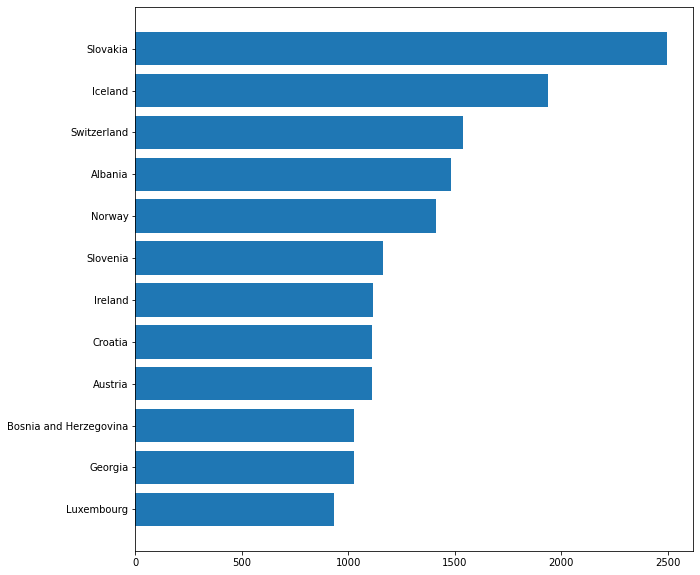

In [77]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.font_manager import FontProperties

%matplotlib inline

sorted_fao = data_fao.sort_values(by = ["Precipitation mm per year"])[-12:]

plt.gcf().set_size_inches(10,10)
plt.barh(sorted_fao["Country"], sorted_fao["Precipitation mm per year"])

# Part II. Plots.

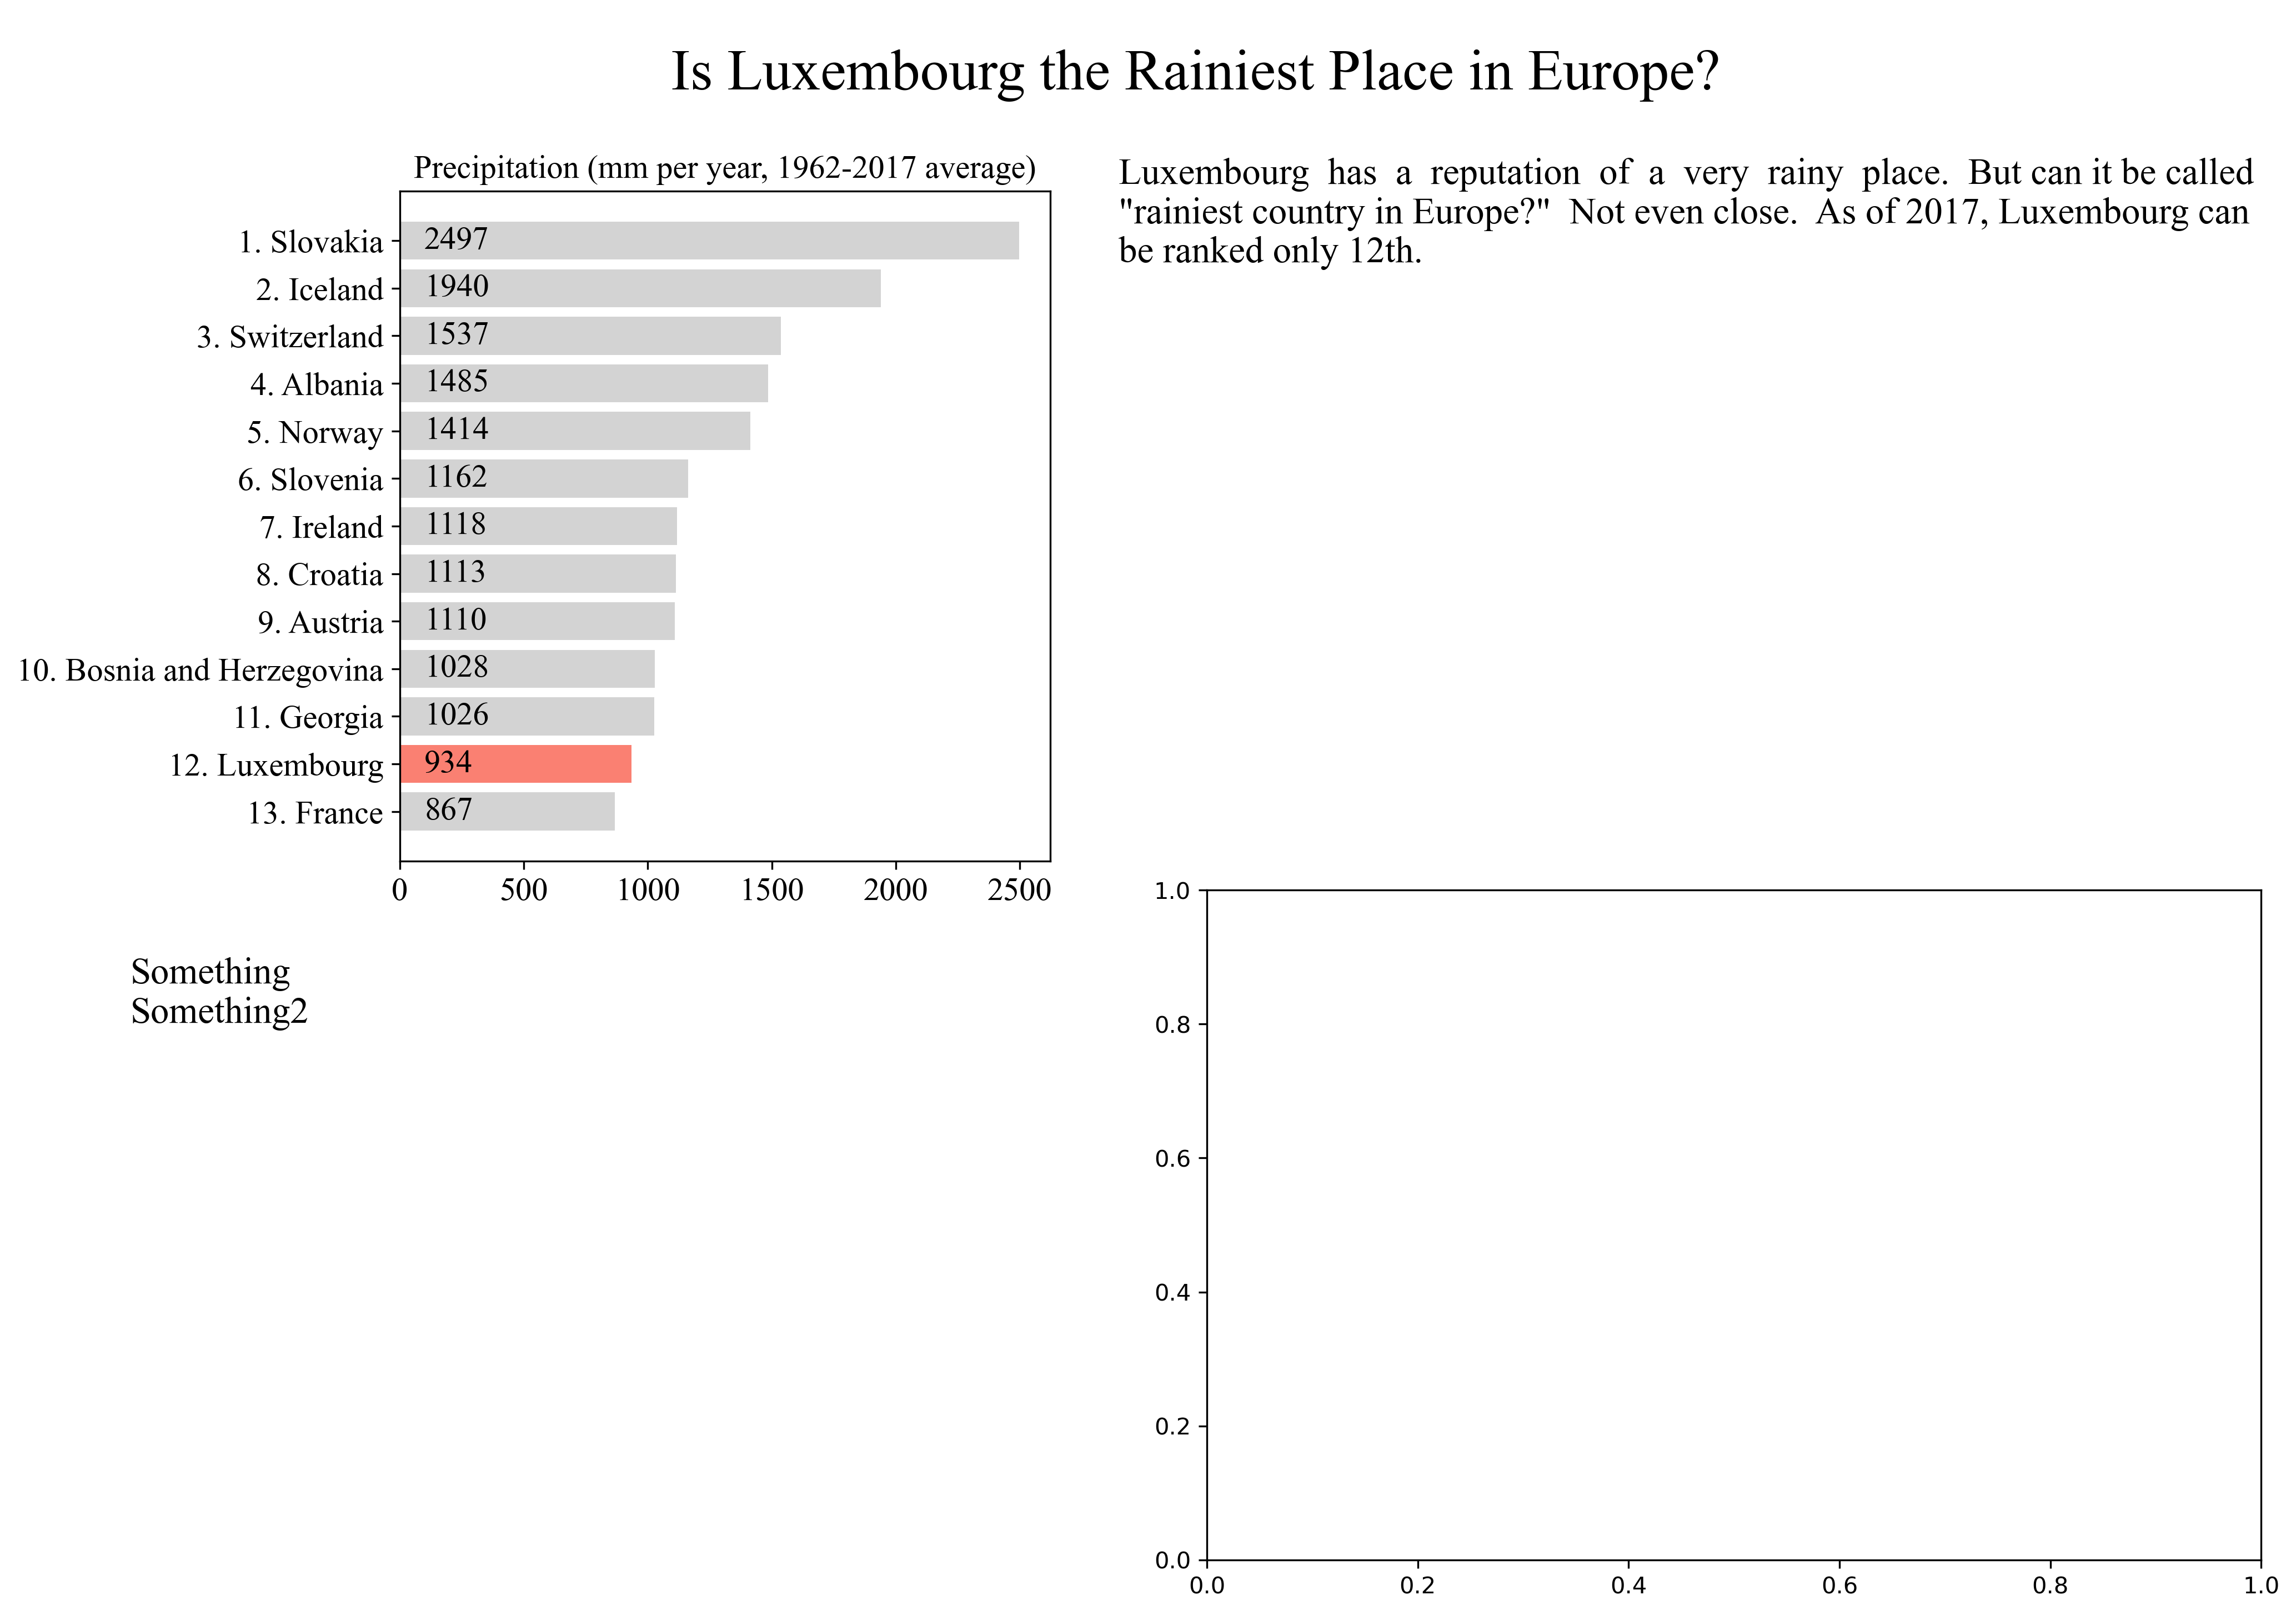

In [250]:
# TODO: Indicate that it is a top 13 values, emphasize in the description, find a way to add rank to the axis.

# TODO: add the description of how the rain is measured. Add one more text field in the beginning? Reference the figures
# (TeX style)?

# TODO: Indicate the data sources clearly (preferrably right there)

# TODO: Why horizontal barplot? Why not a map? Add to README and to project description. Actually, add everything:
# choice of plots, criteria, etc.

# TODO: Work on margins

# TODO: Adding ranks to country names was the most difficult decision. Still the least of evils, though.

# TODO: perhaps, just add UN data.

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.font_manager import FontProperties

%matplotlib inline

def prepare_text_axes(ax):
    ax.set_axis_off()
    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)

normal_font_properties = FontProperties()
normal_font_properties.set_family('serif')
normal_font_properties.set_name('Times New Roman')
normal_font_properties.set_size(16)

smaller_normal_font_properties = FontProperties()
smaller_normal_font_properties.set_family('serif')
smaller_normal_font_properties.set_name('Times New Roman')
smaller_normal_font_properties.set_size(14)

header_font_properties = FontProperties()
header_font_properties.set_family('serif')
header_font_properties.set_name('Times New Roman')
header_font_properties.set_size(25)
header_font_properties.set_weight('bold')

gspec = gridspec.GridSpec(17,16)

f = plt.figure(dpi=300)
f.set_size_inches(16.5, 23.375)

suptitle_axes = plt.subplot(gspec[0,:])
prepare_text_axes(suptitle_axes)
suptitle_axes.text(0,0,"Is Luxembourg the Rainiest Place in Europe?",
                   font_properties=header_font_properties, horizontalalignment='center')

# Section: time comparison plot
num_to_show_after_lux = 1
fao_target = "Precipitation mm per year"
# TODO: determine Luxembourg position automatically
comparison_plot_axes = plt.subplot(gspec[1:5,2:7])
# Looks like horizontal barplot is built from bottom to top. No worries, just need to keep it in mind
sorted_fao = data_fao.sort_values(by = [fao_target])
sorted_fao = (sorted_fao.iloc
    [-(len(sorted_fao) - np.where(sorted_fao["Country"] == "Luxembourg")[0][0] + num_to_show_after_lux):])
bars = comparison_plot_axes.barh(
    [str(len(sorted_fao) - i) +'. ' + sorted_fao["Country"].iloc[i] for i in range(len(sorted_fao["Country"]))],
    sorted_fao[fao_target],
    color=['lightgray']*num_to_show_after_lux + ['salmon'] + ['lightgray']*(len(sorted_fao) - num_to_show_after_lux - 1))
comparison_plot_axes.set_title("Precipitation (mm per year, 1962-2017 average)",
                               font_properties=smaller_normal_font_properties)

for i in range(len(bars)):
    comparison_plot_axes.text(100,i,str(sorted_fao.iloc[i][fao_target]),
                horizontalalignment='left', verticalalignment='center', font_properties=smaller_normal_font_properties)
    comparison_plot_axes.yaxis.get_majorticklabels()[i].set_font_properties(smaller_normal_font_properties)
#comparison_plot_axes.set_yticklabels(new_labels)
    

for i in comparison_plot_axes.xaxis.get_majorticklabels():
    i.set_font_properties(smaller_normal_font_properties)
    
# Section: 
time_plot_axes = plt.subplot(gspec[5:9,8:])
time_text_axes = plt.subplot(gspec[5:9,:8])

# Section:
comaprison_text_axes = plt.subplot(gspec[1:5,7:])
prepare_text_axes(comaprison_text_axes)
comparison_section_text = (
"""     Luxembourg  has  a  reputation  of  a  very  rainy  place.  But can it be called
     "rainiest country in Europe?"  Not even close.  As of 2017, Luxembourg can
     be ranked only 12th.
""")
comaprison_text_axes.text(-1, 1.1, comparison_section_text, horizontalalignment='left', verticalalignment='top',
                    font_properties=normal_font_properties)


prepare_text_axes(time_text_axes)
time_text_axes.text(-1,0.8,"Something\nSomething2", horizontalalignment='left', verticalalignment='top',
                    font_properties=normal_font_properties)

plt.show(f)
f.savefig('draft.pdf')

In [247]:
sorted_fao["Country"].iloc[0]

'France'

In [138]:
sorted_fao = data_fao.sort_values(by = [fao_target])
sorted_fao = (sorted_fao.iloc
    [-(len(sorted_fao) - np.where(sorted_fao["Country"] == "Luxembourg")[0][0] + num_to_show_after_lux):])
sorted_fao

,Country,Code,Precipitation mm per year
125,France,FRA,867
238,Luxembourg,LUX,934
137,Georgia,GEO,1026
54,Bosnia and Herzegovina,BIH,1028
18,Austria,AUT,1110
72,Croatia,HRV,1113
191,Ireland,IRL,1118
356,Slovenia,SVN,1162
291,Norway,NOR,1414
0,Albania,ALB,1485


In [137]:
df = data_fao.sort_values(by = [fao_target])

12

In [204]:
a = comparison_plot_axes.yaxis.majorTicks[0]

In [242]:
ytl[0].get_text()

'France'

In [215]:
[str(i)+". " + str(ytl[i].get_text()) for i in range(len(ytl))]

['0. France',
 '1. Luxembourg',
 '2. Georgia',
 '3. Bosnia and Herzegovina',
 '4. Austria',
 '5. Croatia',
 '6. Ireland',
 '7. Slovenia',
 '8. Norway',
 '9. Albania',
 '10. Switzerland',
 '11. Iceland',
 '12. Slovakia']

In [229]:
new_labels

['0. ',
 '1. ',
 '2. ',
 '3. ',
 '4. ',
 '5. ',
 '6. ',
 '7. ',
 '8. ',
 '9. ',
 '10. ',
 '11. ',
 '12. ']

In [225]:
[str(i)+". " + str(ytl[i].get_text()) for i in range(len(ytl))]

['0. France',
 '1. Luxembourg',
 '2. Georgia',
 '3. Bosnia and Herzegovina',
 '4. Austria',
 '5. Croatia',
 '6. Ireland',
 '7. Slovenia',
 '8. Norway',
 '9. Albania',
 '10. Switzerland',
 '11. Iceland',
 '12. Slovakia']

In [239]:
str(0)+". " + str(ytl[0].get_text())

'0. France'